Описательная статистика

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# os.chdir("/content/drive/My Drive/BSU/DataSet/DescriptiveStatistics/")

In [4]:
# Набор данных содержит информацию из офиса Ames Assessor Office, используемую для вычисления оценочных значений
#для отдельных жилых объектов, проданных в Ames, IA с 2006 по 2010 год.

AH = pd.read_csv('AmesHousing.txt', sep="\t", header = 0, index_col=False)
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html
# Полезные параметры:

#     sep -- задаёт символ-разделитель полей в файле (по умолчанию разделитель запятая); sep="\t" - сепаратор табуляция
#     names -- список названий колонок, если он не задан в файле;
#     index_col -- номер колонки с индексом.
#     decimal -- символ-разделитель для знаков после запятой.
#          decimal=b',',
AH.head(20)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
5,6,527105030,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,195500
6,7,527127150,120,RL,41.0,4920,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,213500
7,8,527145080,120,RL,43.0,5005,Pave,NaN,IR1,HLS,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,191500
8,9,527146030,120,RL,39.0,5389,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,236500
9,10,527162130,60,RL,60.0,7500,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,189000


In [5]:
print(AH.shape)

(2930, 82)


In [6]:
print(len(AH))

2930


In [7]:
AH.dtypes

Order               int64
PID                 int64
MS SubClass         int64
MS Zoning          object
Lot Frontage      float64
                   ...   
Mo Sold             int64
Yr Sold             int64
Sale Type          object
Sale Condition     object
SalePrice           int64
Length: 82, dtype: object

In [8]:
AH["Order"].dtype

dtype('int64')

Данные могут измеряться различными шкалами.
- Количественная шкала, то есть результат измерения представляет собой число (килограммы, метры, литры, минуты)
- Порядковая шкала, то есть результат измерения можно сравнивать между собой, но такие операции как, например разность, не имеют смысла (место занятое атлетом на соревновании)
- Номинальная шкала, то есть результат измерения получается число или числовой код, и сравнивать эти числа нельзя (код города)

In [9]:
#Выведем описательную статистику
AH.describe(include='all')

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2930,2440.000000,2930.000000,2930,198,2930,2930,...,2930.000000,13,572,106,2930.000000,2930.000000,2930.000000,2930,2930,2930.000000
unique,NaN,NaN,NaN,7,NaN,NaN,2,2,4,4,...,NaN,4,4,5,NaN,NaN,NaN,10,6,NaN
top,NaN,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,...,NaN,Ex,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,NaN,2273,NaN,NaN,2918,120,1859,2633,...,NaN,4,330,95,NaN,NaN,NaN,2536,2413,NaN
mean,1465.50000,7.144645e+08,57.387372,NaN,69.224590,10147.921843,NaN,NaN,NaN,NaN,...,2.243345,NaN,NaN,NaN,50.635154,6.216041,2007.790444,NaN,NaN,180796.060068
std,845.96247,1.887308e+08,42.638025,NaN,23.365335,7880.017759,NaN,NaN,NaN,NaN,...,35.597181,NaN,NaN,NaN,566.344288,2.714492,1.316613,NaN,NaN,79886.692357
min,1.00000,5.263011e+08,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,12789.000000
25%,733.25000,5.284770e+08,20.000000,NaN,58.000000,7440.250000,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,4.000000,2007.000000,NaN,NaN,129500.000000
50%,1465.50000,5.354536e+08,50.000000,NaN,68.000000,9436.500000,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,160000.000000
75%,2197.75000,9.071811e+08,70.000000,NaN,80.000000,11555.250000,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,213500.000000


describe формирует статистику по числовым данным и номинальной шкале.
- count - количество не NAN/нулевых наблюдений.
- max/min - максимум/минимум значений в объекте.
- mean - среднее арифметическое значение.
- std - стандартное отклонение наблюдений.
- unique - количество уникальных значений.
- top - самое распространенное значение.
- freq - сколько раз в наборе данных встречается top.

Кванти́ль в математической статистике — значение, которое заданная случайная величина не превышает с фиксированной вероятностью. Для определения квантили, выборка упорядочивается по возрастанию.
- 0,25-квантиль называется первым (или нижним) кварти́лем (от лат. quarta — четверть);
- 0,5-квантиль называется медианой (от лат. mediāna — середина) или вторым кварти́лем;
- 0,75-квантиль называется третьим (или верхним) кварти́лем.
- Интеркварти́льный размах (Interquartile range) - разность между третьим и первым квартилями.

АНАЛИЗ ГИСТОГРАММ

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

# выбор темы картинок на Ваш вкус. Необязательная строчка.
matplotlib.style.use('ggplot')
# Эта строчка нужна для того, чтобы картинки отображались в ячейках
%matplotlib inline
#  https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html

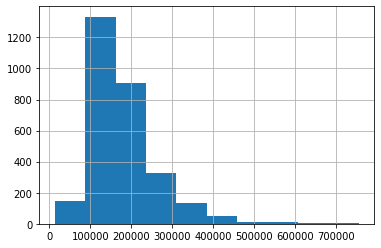

In [13]:
#Построим гистограмму
AH['SalePrice'].hist();

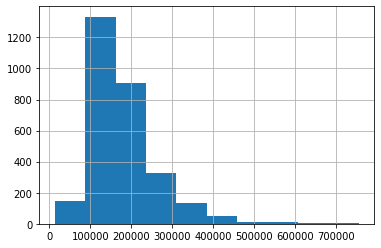

In [12]:
AH['SalePrice'].hist();

Применим при построении гистограмы density для построения вероятностной гистограммы.
density - если True первым элементом возвращаемого кортежа будет число, нормализованное для формирования плотности вероятности, т.е. площадь под гистограммой будет равна 1. 
Зачем добиваться площади под гистограммой равной 1?
- Если мы будем сравнивать два набора данных по какому либо параметру, а именно будем сравнивать две гистограммы. И если в одной выборке 10000 значений а в другой 20000 значений, то одна из гистограмм будет выше просто за счет различия количества наблюдений в наборах данных. Следовательно необходимо их нормировать, что и делает density.
- Это нам дает вид плотности распределения вероятности, то есть с ростом числа наблюдений гистограмма приближается к плотности распределения вероятности.

In [ ]:
AH['SalePrice'].hist(bins=60, density=1);

При постороении гистограммы необходимо поварьировать параметр bins, так как в зависимости от него может меняться визуальное восприятие гистограммы, например, может меняться число выбросов.

In [ ]:
print(plt.style.available)
# https://matplotlib.org/gallery/style_sheets/style_sheets_reference.html

In [ ]:
matplotlib.style.use('tableau-colorblind10')
AH['SalePrice'].hist(bins=60, density=1);

In [ ]:
#Логарифмирвоание может приблизить вид гистограммы к нормальному распределению 
np.log(AH['SalePrice']).hist(bins=45, density=1);

ЯДЕРНАЯ ОЦЕНКА ПЛОТНОСТИ РАСПРЕДЕЛЕНИЯ

In [ ]:
import seaborn as sns

In [ ]:
plt.figure()
sns.distplot(AH['SalePrice'],  ax=plt.gca(), bins=60)

Линия на гистограмме представляет собой ядерную оценку плотности распределения, а не плотность распределения.
Ядерная оценка ничего нового не вносит, грубо говоря просто сглаживает гистограмму.

In [ ]:
#Вывод нескольких гистограмм на график. Сформируем группы по типу района застройки
# По идее, вызов должен быть такой: df.groupby('Status')['Length'].hist(alpha=0.6)
# Но из-за бага https://github.com/pandas-dev/pandas/issues/10756
# приходится делать дополнительный вызов plot
AH.groupby('MS Zoning')['SalePrice'].plot.hist(alpha=0.6)
# groupby группировка данных по заданному столбцу
#Добавляем легенду
plt.legend();

Почему не отражаются все группы районов? Дело в том, что остальные районы представлены маленьки выборками и чтобы можно было их сравнить между собой необходимо нормирвоать данные

In [ ]:
AH.groupby('MS Zoning')['SalePrice'].plot.hist(density=1, alpha=0.6)
plt.legend();

Вывод. Одна гистограмма хорошо. Две тоже можно. Но когда гистограмм много, то они накладываются друг на друга и информативность падает. Таким образом, гистограммы не предназначены для сравнения совокупности показателей. Выходом служит построение ящиков с усами. Ящики с усами являются приближением гистограммы и могут потерять информативность в случае например бимодальной гистограммы. Поэтому, при сравнении малого числа выборок лучше строить гистограммы.

**ЯЩИКИ С УСАМИ ИЛИ ЯЩИКОВЫЕ ДИАГРАММЫ**

![](https://drive.google.com/uc?export=view&id=11yIzfJba8FusO-6uA6ghWj619MVcI-gq)

In [ ]:
ax = AH.boxplot(column='SalePrice', by='MS Zoning')
# Хак для того, чтобы исправить наезжающие заголовки графика
ax.get_figure().suptitle('')

In [ ]:
plt.figure()
ax = sns.boxplot(x=AH["SalePrice"])

In [ ]:
plt.figure()
ax = sns.boxplot(x="MS Zoning", y="SalePrice", data=AH)

**Ящик с усами относительно нормального распределения**

![](https://drive.google.com/uc?export=view&id=1rRshJoCW873xQmjl6Al_CPyCsw1oO6Fi)

Построение ящиков с усами.
- Нижняя и верхняя граница ящика это первая и третья квартили.
- Линия внутри ящика соответствует второй квартили (медиане).
- Ус тянется до того, до чего ближе (либо до максимума, либо да максимум умноженный на полторы длины ящика).
- Все, что дальше уса обозначается кружками (выбросы). Кружки рисуются до максимум умноженного на три длины ящика.
- После трех длин ящика рисуются звездочки (экстремальные значения).
- Последний кружок или звездочка соответствуют максимуму.
- Аналогично ус строится по другую сторону ящика.
- boxplot рисует все, что выходит за пределы усов только кружками.
<img src="images/boxplot.png"/>

In [ ]:
print (AH['MS Zoning'].value_counts())

Построенные ящики с усами показывают, что самые дешевые дома в сельской местности (Agr). Однако, не стоит этому сильно доверять, так как из ящика с усами не понятно каким числом наблюдений характеризуется выборка. После подсчета количества наблюдений для каждой выборки видно, что дома сельской местности представлены всего 2 примерами, что не является репрезентативной выборкой. Аналогично имеются и другие выборки, представленные малым числом наблюдений.
Таким образом, получается что параметр окружения является информативным, так как в зависимости от окружения меняется стоимость дома. Однако, как быть с неинформативностью некоторых выборок, представленных всего двумя наблюдениями.

**ТИПИЧНОЕ ЗНАЧЕНИЕ ВЫБОРКИ**

Среднее или медиана.
Пример, средний чек

Проведем анализ населения городов России в 1959 году. Данные получены по результатам переписи населения.
Описание данных. Население в тысячах человек. В выборку попали населенные пункты, которые считаются городами России в настоящее время, даже если в 1959 году они еще не считались городами.

In [ ]:
# os.chdir("/content/drive/My Drive/BSU/DataSet/DescriptiveStatistics")

In [ ]:
town = pd.read_csv('town_1959.csv', encoding='cp1251', index_col=u'номер')
town.head()

,город,население
номер,,
1,Москва,5046.0
2,Санкт-Петербург,3003.0
3,Нижний_Новгород,941.0
4,Новосибирск,885.0
5,Самара,806.0


In [ ]:
import csv
t = csv.reader('town_1959.csv', delimiter = ',')
t


In [ ]:
print(town)
print(town.shape)

                 город  население
номер                            
1               Москва     5046.0
2      Санкт-Петербург     3003.0
3      Нижний_Новгород      941.0
4          Новосибирск      885.0
5               Самара      806.0
...                ...        ...
1 000      Усть-Илимск        0.5
1 001            Ясный        0.5
1 002           Мегион        0.4
1 003            Надым        0.3
1 004           Вуктыл        0.1

[1004 rows x 2 columns]
(1004, 2)


In [ ]:
# описательные статистики, характеризующие выборку
town.describe()

,население
count,1004.000000
mean,52.925199
std,204.885662
min,0.100000
25%,10.700000
50%,19.250000
75%,37.975000
max,5046.000000


In [ ]:
# Наблюдение 1. Среднее арифметическое больше 3 квартили!
# Уточним.

len(town[town['население'] < 52.925199])/len(town)*100

82.37051792828686

In [ ]:
# Наблюдение 2. Если в качестве населения типичного города
# России взять среднее арифметическое, то 82% городов России
# имеет население меньше, чем население типичного города.
# Что вызывает дискомфорт. Такое наблюдение не воспринимается как типичное...

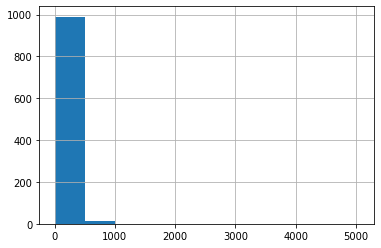

In [ ]:
town['население'].hist()

In [ ]:
#  удалим выбросы Москву и Питер

town_2 = town.iloc[2:1004,:]
town_2.describe()

,население
count,1002.000000
mean,44.997904
std,91.645867
min,0.100000
25%,10.700000
50%,19.150000
75%,37.550000
max,941.000000


In [ ]:
len(town_2[town_2['население'] < 44.997904])/len(town_2)*100

78.84231536926147

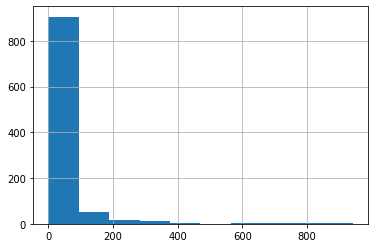

In [ ]:
town_2['население'].hist()

Как видно для данной выборки арифметическое среднее не описывает типичное среднее выборки. Как до удаления, так и после удаления двух выбросов mean больше третей квартили. Посмотрим на медиану. Медиана соответствует второй квартили. В исходных данных медиана составляла 19.25. После удаления выбросов медиана составила 19.15, то есть почти не изменилась.
Выводы: среднее арифметическое не устойчиво к выбросам и в этом случае лучше использовать медиану.

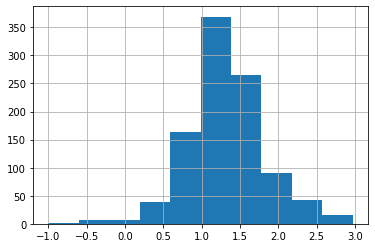

In [ ]:
# получим логнормальное распределение, для которого уже и среднее арифметическое и медиана будут близкими по значению
x = np.log10(town_2['население'])
pd.Series(x).hist()

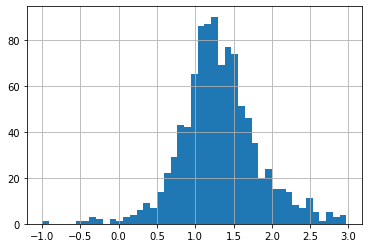

In [ ]:
pd.Series(x).hist(bins=45)

На гистограмме видны выбросы.

**Вывод**. Выбросы лучше убирать после логарифмирования, а не до.

 Если убирать выбросы сразу (Москва и Питер), то вылезут следующие города со значительным отклонением. После логарифмирования же мы видим практически все выбросы сразу.

Другим кандидатом на роль типичного наблюдения выступает усеченное среднее, основанное на удалении выбросов. Для этого отбразывается 5% наблюдений: 2,5% слева(самые маленькие наблюдения), 2,5% справа (самые большие наблюдения). По оставшимся данным рассчитывается среднее арифметическое.

Имееются и другие математические описания типичного наблюдения. 

РАЗБРОС ДАННЫХ

In [ ]:
town.describe()

,население
count,1004.000000
mean,52.925199
std,204.885662
min,0.100000
25%,10.700000
50%,19.250000
75%,37.975000
max,5046.000000


In [ ]:
#Разброс данных можно описать при помощи:
#Размах можно определить как разность: max-min. Чувствителен к выбросам
#Межквартильный размах: разность между значение Q3 квартили и Q1
#Стандартное отклонение (корень из дисперсии)
s=pd.Series(town['население'])

print('Размах = ', s.max()-s.min())
print('Межквартильный размах = ', s.quantile(0.75)-s.quantile(0.25))
so=s.std
print('Стандартное отклонение = ', s.std())


Размах =  5045.9
Межквартильный размах =  27.274999999999995
Стандартное отклонение =  204.88566213577238


**Description of tips dataset.**

На советы кулинарных серверов в ресторанах могут влиять многие факторы, в том числе характер ресторана, размер вечеринки и расположение столиков в ресторане. Менеджеры ресторанов должны знать, какие факторы имеют значение, когда они назначают столы для серверов питания. Ради морального духа персонала они обычно хотят избежать существа или появления несправедливого отношения к серверам, для которых чаевые (по крайней мере, в ресторанах в США) являются основным компонентом оплаты. В одном из ресторанов сервер питания записал следующие данные обо всех клиентах, которых они обслуживали в начале двух с половиной месяцев в начале 1990 года. Ресторан, расположенный в пригородном торговом центре, был частью национальной сети и обслуживал разнообразное меню. В соответствии с местным законодательством, ресторан предложил разместиться в секции для некурящих посетителям, которые просили об этом. Каждая запись включает день и время, и, вместе взятые, они показывают график работы сервера.

In [ ]:
# os.chdir("/content/drive/My Drive/BSU/DataSet/DescriptiveStatistics")
tips = pd.read_csv('tips.csv', encoding='cp1251') #index_col=u'номер'

In [ ]:
tips

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,1,16.99,1.01,Female,No,Sun,Dinner,2
1,2,10.34,1.66,Male,No,Sun,Dinner,3
2,3,21.01,3.50,Male,No,Sun,Dinner,3
3,4,23.68,3.31,Male,No,Sun,Dinner,2
4,5,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...,...
239,240,29.03,5.92,Male,No,Sat,Dinner,3
240,241,27.18,2.00,Female,Yes,Sat,Dinner,2
241,242,22.67,2.00,Male,Yes,Sat,Dinner,2
242,243,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
tips = tips.drop(labels='Unnamed: 0', axis=1)
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


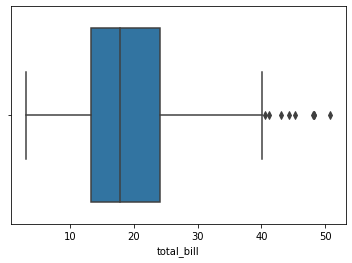

In [ ]:
plt.figure()
ax = sns.boxplot(x=tips["total_bill"])

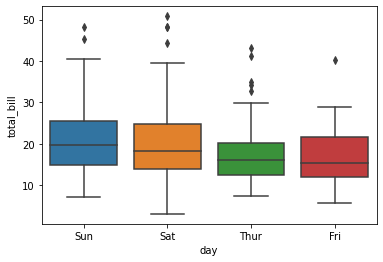

In [ ]:
plt.figure()
ax = sns.boxplot(x="day", y="total_bill", data=tips)

**Препроцессинг данных**

In [ ]:
# преобразование признака курение
tips['smoker'].replace({'Yes': True, 'No': False}, inplace=True) #inplace=True применить изменения к датасету
tips.tail(25)

In [ ]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()


In [ ]:
print(tips.shape)
tips['day'] = enc.fit_transform(np.array(tips['day'].values).reshape(-1, 1))
tips.head()

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,False,"(0, 2)\t1.0\n (1, 2)\t1.0\n (2, 2)\t1.0\n ...",Dinner,2
1,10.34,1.66,Male,False,"(0, 2)\t1.0\n (1, 2)\t1.0\n (2, 2)\t1.0\n ...",Dinner,3
2,21.01,3.50,Male,False,"(0, 2)\t1.0\n (1, 2)\t1.0\n (2, 2)\t1.0\n ...",Dinner,3
3,23.68,3.31,Male,False,"(0, 2)\t1.0\n (1, 2)\t1.0\n (2, 2)\t1.0\n ...",Dinner,2
4,24.59,3.61,Female,False,"(0, 2)\t1.0\n (1, 2)\t1.0\n (2, 2)\t1.0\n ...",Dinner,4


**Построение диаграмм рассеяния** с применением функции [seaborn.pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

По умолчанию эта функция создает сетку осей, так что каждая числовая переменная в ней будет совместно использоваться по осям Y в одной строке и осям X в одном столбце.

Диагональные графики обрабатываются по-разному: строится график одномерного распределения, чтобы показать предельное распределение данных в каждом столбце.



<string>:6: SparseEfficiencyWarning: Comparing a sparse matrix with 0 using == is inefficient, try using != instead.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


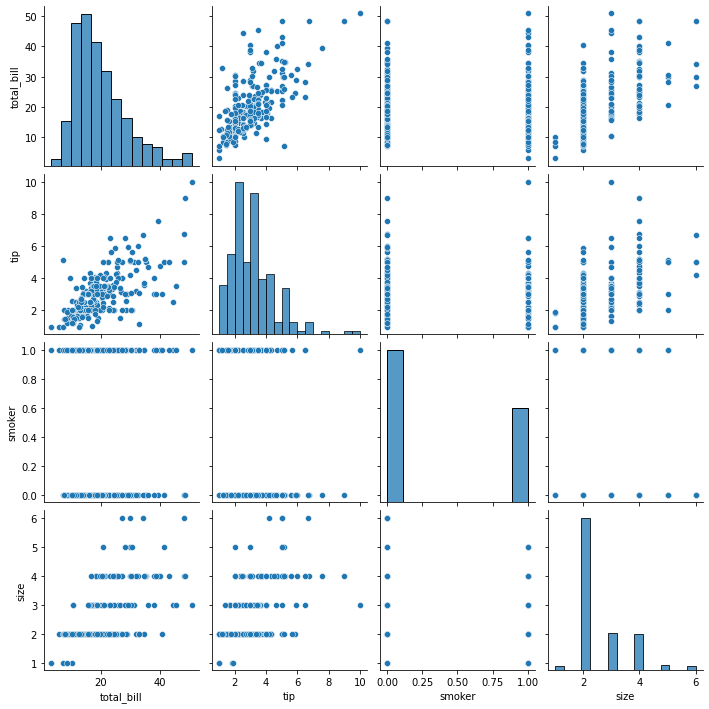

In [ ]:
sns.pairplot(tips)

<string>:6: SparseEfficiencyWarning: Comparing a sparse matrix with 0 using == is inefficient, try using != instead.


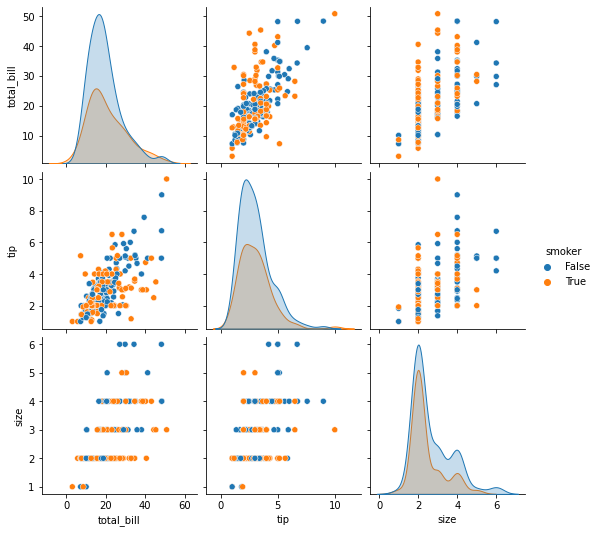

In [ ]:
# Присвоение hueпеременной добавляет семантическое отображение и изменяет маргинальный график по умолчанию на многоуровневую оценку плотности ядра:
sns.pairplot(tips, hue = 'smoker')

<string>:6: SparseEfficiencyWarning: Comparing a sparse matrix with 0 using == is inefficient, try using != instead.
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/d

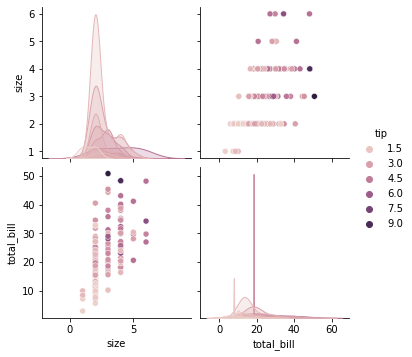

In [ ]:
sns.pairplot(tips, hue = 'tip', vars = ['size', 'total_bill'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


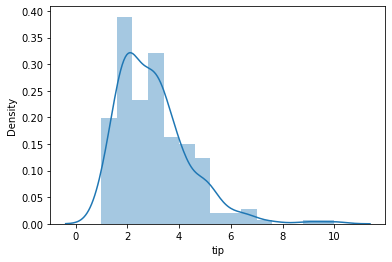

In [ ]:
plt.figure()
sns.distplot(tips['tip'], ax=plt.gca(), bins = 15)

In [ ]:
#Вычислим попарную корреляцию столбцов, исключая значения NA / null.
corr_matrix = tips.corr()
corr_matrix


,total_bill,tip,smoker,size
total_bill,1.000000,0.675734,0.085721,0.598315
tip,0.675734,1.000000,0.005929,0.489299
smoker,0.085721,0.005929,1.000000,-0.133178
size,0.598315,0.489299,-0.133178,1.000000


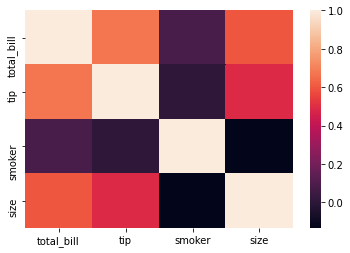

In [ ]:
plt.figure()
sns.heatmap(corr_matrix, ax=plt.gca())

# ДЗ

Для датасета `tips` необходимо ответить на следующие вопросы:
* Сколько мужчин и сколько женщин заплатили чаевые?
* Определите долю курящих среди мужчин и женщин.
* На какой день в среднем приходилось наибольшее количество посетителей? (учитывайте размер столика)
* На какое время суток приходится наибольшее количество чаевых?
* В какой день недели был заказ с максимальным счетом?
* Постройте столбчатую гистограмму, где данные сгруппированы по дню недели (X) и медианное значение общего счета (Y). Столбцы для каждого дня должны учитывать, курит посетитель или нет.
* Построить гистограмму распределения целевого признака - чаевых (tips)
* Преобразовать категориальные признаки (время суток, день) sklearn.preprocessing.OneHotEncoder и бинарные (пол, курение) в числовой вид
* Построить seaborn.pairplot для признаков
* Построить диаграмму рассеяния в координатах чаевые/общий счет с hue='smoke'